In [8]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from models import resnet152V2Model
import pandas as pd
from utils import plot_training_hist

In [3]:
(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()
y_train_10 = to_categorical(y_train_10, 10)
y_test_10 = to_categorical(y_test_10, 10)
x_train_10, x_vali_10, y_train_10, y_vali_10 = train_test_split(x_train_10, y_train_10, test_size=0.05, random_state=42)

## Residual Network 152 (ResNet152V2)

In [5]:
modelresnet152 = resnet152V2Model()
modelresnet152.count_params()

58352138

In [6]:
lrSchedule = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=10, verbose=1)
checkpoint = ModelCheckpoint("./saved_weights/resnet152_weights.hdf5",
                             monitor='val_loss', verbose = 0, save_best_only = True,
                             mode='auto', sav_freq = 'epoch')
modelresnet152.compile(optimizer=Adam(learning_rate=1e-4),metrics="categorical_accuracy",loss="categorical_crossentropy")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
vali_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_hist = modelresnet152.fit(
    train_datagen.flow(x_train_10, y_train_10, batch_size=64, shuffle=True),
    callbacks = [checkpoint,lrSchedule],
    validation_data = vali_datagen.flow(x_vali_10, y_vali_10, shuffle=False, batch_size=64),
    steps_per_epoch=len(x_train_10) / 64, epochs=100,
    verbose=1)

Epoch 1/100
743/742 [==============================] - 78s 105ms/step - loss: 2.1185 - categorical_accuracy: 0.2259 - val_loss: 1.8942 - val_categorical_accuracy: 0.3112
Epoch 2/100
743/742 [==============================] - 79s 107ms/step - loss: 1.8478 - categorical_accuracy: 0.3258 - val_loss: 1.6865 - val_categorical_accuracy: 0.3900
Epoch 3/100
743/742 [==============================] - 80s 107ms/step - loss: 1.7190 - categorical_accuracy: 0.3738 - val_loss: 1.5610 - val_categorical_accuracy: 0.4384
Epoch 4/100
743/742 [==============================] - 80s 107ms/step - loss: 1.6279 - categorical_accuracy: 0.4079 - val_loss: 1.4856 - val_categorical_accuracy: 0.4748
Epoch 5/100
743/742 [==============================] - 72s 97ms/step - loss: 1.5578 - categorical_accuracy: 0.4363 - val_loss: 1.4901 - val_categorical_accuracy: 0.4552
Epoch 6/100
743/742 [==============================] - 80s 107ms/step - loss: 1.4971 - categorical_accuracy: 0.4604 - val_loss: 1.4234 - val_categorica

In [9]:
pd.DataFrame(training_hist.history).to_csv("./saved_hists/resnet152-cifar10-hist.csv", index = False)
modelresnet152.load_weights("./saved_weights/resnet152_weights.hdf5")
modelresnet152.save("./saved_models/resnet152")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: resnet152/assets


In [10]:
modelresnet152.evaluate(
    test_datagen.flow(x_test_10, y_test_10, batch_size=1000))

10/10 [==============================] - 1s 114ms/step - loss: 0.8024 - categorical_accuracy: 0.8068


[0.8023534417152405, 0.8068000078201294]

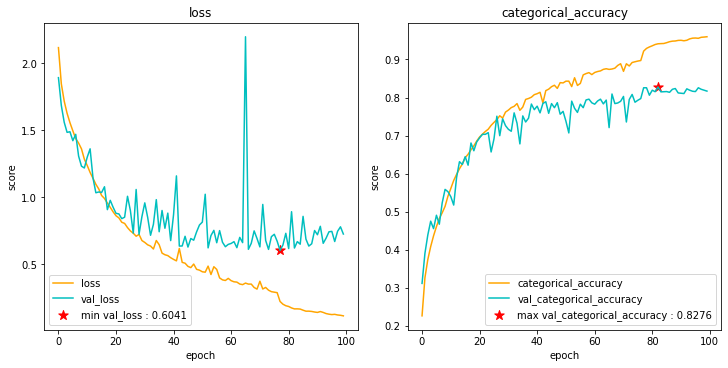

In [13]:
plot_training_hist(pd.read_csv("./saved_hists/resnet152-cifar10-hist.csv"))